core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req      

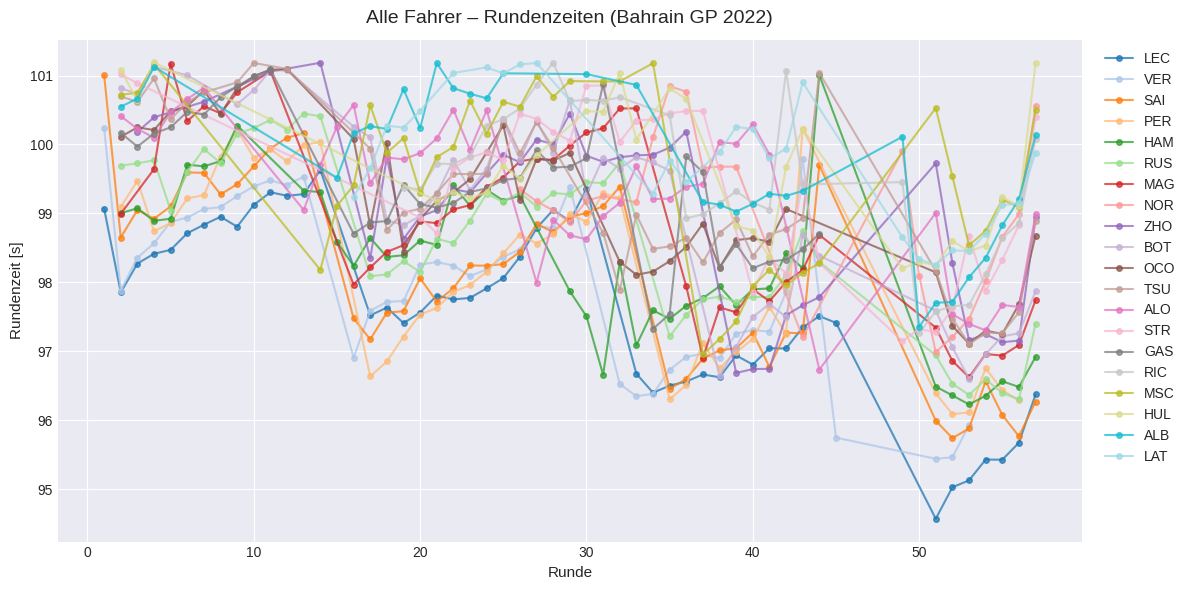

In [8]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Session laden
session = fastf1.get_session(2022, 'Bahrain', 'R')
session.load()

# Alle Quicklaps auswählen (echte Rennrunden)
laps = session.laps.pick_quicklaps()
# Sicherstellen, dass keine NaT in LapTime ist
laps = laps.dropna(subset=['LapTime']).copy()

# Rundenzeiten in Sekunden umrechnen
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()

# Fahrer sortieren nach durchschnittlicher Rundenzeit (für konsistente Farben/Legende)
driver_order = laps.groupby('Driver')['LapTime_sec'].mean().sort_values().index.tolist()

# Plot-Stil und Größe
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (12, 6)

# Farben: colormap mit so vielen Farben wie Fahrer
n_drivers = len(driver_order)
cmap = plt.get_cmap('tab20', n_drivers) if n_drivers > 0 else plt.get_cmap('tab20')

# Plotten: jede Fahrerlinie etwas transparent, kleine Marker
fig, ax = plt.subplots()
for i, drv in enumerate(driver_order):
    d = laps[laps['Driver'] == drv]
    if d.empty:
        continue
    ax.plot(d['LapNumber'], d['LapTime_sec'], marker='o', markersize=4, linestyle='-',
            color=cmap(i), alpha=0.75, label=drv)

# Achsen & Titel
ax.set_xlabel('Runde', fontsize=11)
ax.set_ylabel('Rundenzeit [s]', fontsize=11)
ax.set_title('Alle Fahrer – Rundenzeiten (Bahrain GP 2022)', fontsize=14, pad=12)

# Legende außerhalb des Plots (vermeidet Überlagerung)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False, ncol=1)

plt.tight_layout()
plt.show()
